# Trained a MLP over a FashionMNIST dataset

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)


2.2.0
2.3.0-tf


In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [4]:
X_train_full.shape

(60000, 28, 28)

In [5]:
X_train_full.dtype

dtype('uint8')

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0

y_valid, y_train = y_train_full[:5000], y_train_full[5000:]


In [7]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", 
               "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [8]:
class_names[y_train[0]]

'Coat'

In [9]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))

model.add(keras.layers.Dense(10, activation = "softmax"))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.layers

In [12]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [13]:
model.get_layer('dense') is hidden1

True

In [14]:
weights, biases = hidden1.get_weights()

In [15]:
weights

array([[-0.0355197 , -0.01535451, -0.06457192, ...,  0.01604073,
        -0.02743782, -0.04642612],
       [-0.06862991, -0.00929662,  0.03241639, ...,  0.02727617,
        -0.03216932,  0.00387728],
       [ 0.0369471 ,  0.03194173, -0.01380565, ..., -0.0513496 ,
         0.04147089,  0.02543759],
       ...,
       [-0.06115595, -0.05806524,  0.041197  , ..., -0.03564297,
         0.02383313, -0.00467683],
       [-0.04548165,  0.05554454,  0.06114762, ...,  0.03741098,
         0.04501127,  0.06457531],
       [-0.03486945,  0.01507574, -0.06759527, ...,  0.02231553,
        -0.02397748,  0.05497414]], dtype=float32)

In [16]:
weights.shape

(784, 300)

In [17]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [18]:
biases.shape

(300,)

In [19]:
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])


In [20]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 13s 8ms/step - loss: 0.7205 - accuracy: 0.7635 - val_loss: 0.4993 - val_accuracy: 0.8330
Epoch 2/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4881 - accuracy: 0.8308 - val_loss: 0.4525 - val_accuracy: 0.8478
Epoch 3/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4430 - accuracy: 0.8449 - val_loss: 0.4403 - val_accuracy: 0.8500
Epoch 4/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4154 - accuracy: 0.8542 - val_loss: 0.4172 - val_accuracy: 0.8562
Epoch 5/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.3960 - accuracy: 0.8617 - val_loss: 0.3900 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3820 - accuracy: 0.8656 - val_loss: 0.3740 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3680 - accuracy: 0.8693 - val_loss: 0.3752 - val_ac

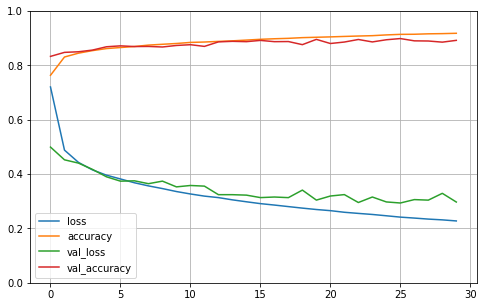

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 65.0267 - accuracy: 0.8476


[65.02668762207031, 0.847599983215332]